In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

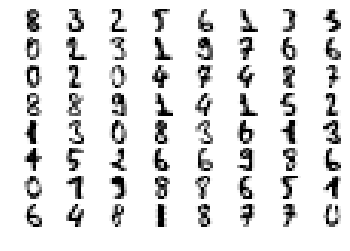

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 40)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [18]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.50801 stdev: 0.07924
Best fitness: 0.81880 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.313
Mean genetic distance 2.946, standard deviation 0.498
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.421 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54165 stdev: 0.08311
Best fitness: 0.81880 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.200
Mean genetic distance 3.033, standard deviation 0.508
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.631 sec (6.026 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56815 stdev: 0.09611
Best fitness: 0.81880 - size: (2, 13) - species 20 - id 166
Average adjusted fitness: 0.257
Mean genetic distance 3.012, standard deviation 0.493
Population of 203 members in 30 species
Total extincti

Total extinctions: 0
Generation time: 7.368 sec (7.256 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67156 stdev: 0.11075
Best fitness: 0.83612 - size: (3, 16) - species 30 - id 2781
Average adjusted fitness: 0.286
Mean genetic distance 3.130, standard deviation 0.527
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 7.240 sec (7.228 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65694 stdev: 0.11719
Best fitness: 0.83612 - size: (3, 16) - species 30 - id 2781
Average adjusted fitness: 0.259
Mean genetic distance 3.138, standard deviation 0.536
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.077 sec (7.237 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66009 stdev: 0.11772
Best fitness: 0.83612 - size: (3, 16) - species 30 - id 2781
Average adjusted fitness: 0.351
Mean genetic distance 3.142, standard deviation 0.540
Populati

Population's average fitness: 0.59961 stdev: 0.08461
Best fitness: 0.75387 - size: (4, 17) - species 14 - id 1029
Average adjusted fitness: 0.269
Mean genetic distance 3.251, standard deviation 0.466
Population of 202 members in 49 species
Total extinctions: 0
Generation time: 6.848 sec (6.612 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60226 stdev: 0.08273
Best fitness: 0.76623 - size: (3, 13) - species 41 - id 1453
Average adjusted fitness: 0.219
Mean genetic distance 3.236, standard deviation 0.468
Population of 201 members in 49 species
Total extinctions: 0
Generation time: 6.795 sec (6.759 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61510 stdev: 0.07748
Best fitness: 0.76623 - size: (3, 13) - species 41 - id 1453
Average adjusted fitness: 0.186
Mean genetic distance 3.241, standard deviation 0.472
Population of 201 members in 49 species
Total extinctions: 0
Generation time: 6.910 sec (6.866 average)

 ******

Population's average fitness: 0.64147 stdev: 0.10278
Best fitness: 0.81633 - size: (7, 26) - species 6 - id 3712
Average adjusted fitness: 0.220
Mean genetic distance 3.222, standard deviation 0.499
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.311 sec (7.389 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.64333 stdev: 0.09850
Best fitness: 0.81633 - size: (7, 26) - species 6 - id 3712
Average adjusted fitness: 0.224
Mean genetic distance 3.234, standard deviation 0.482
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.572 sec (7.394 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65641 stdev: 0.09298
Best fitness: 0.81694 - size: (4, 15) - species 58 - id 4348
Average adjusted fitness: 0.238
Mean genetic distance 3.235, standard deviation 0.492
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.806 sec (7.558 average)

 ****** R

Mean genetic distance 3.205, standard deviation 0.502
Population of 189 members in 38 species
Total extinctions: 0
Generation time: 6.620 sec (6.837 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60261 stdev: 0.07320
Best fitness: 0.73593 - size: (4, 17) - species 20 - id 928
Average adjusted fitness: 0.205
Mean genetic distance 3.200, standard deviation 0.501
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 6.717 sec (6.839 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59535 stdev: 0.07596
Best fitness: 0.73593 - size: (4, 17) - species 20 - id 928
Average adjusted fitness: 0.191
Mean genetic distance 3.211, standard deviation 0.513
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 6.721 sec (6.740 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60091 stdev: 0.07305
Best fitness: 0.73593 - size: (4, 17) - species 20 - id 928
Ave

Population's average fitness: 0.61559 stdev: 0.13003
Best fitness: 0.78293 - size: (3, 16) - species 21 - id 499
Average adjusted fitness: 0.349
Mean genetic distance 3.075, standard deviation 0.495
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 5.898 sec (5.677 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62267 stdev: 0.13997
Best fitness: 0.86085 - size: (3, 13) - species 16 - id 701
Average adjusted fitness: 0.391
Mean genetic distance 3.067, standard deviation 0.481
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.108 sec (5.785 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64501 stdev: 0.12804
Best fitness: 0.86085 - size: (3, 13) - species 16 - id 701
Average adjusted fitness: 0.337
Mean genetic distance 3.108, standard deviation 0.466
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.356 sec (5.899 average)

 ****** Runn

Population's average fitness: 0.69557 stdev: 0.12386
Best fitness: 0.86085 - size: (3, 13) - species 37 - id 701
Average adjusted fitness: 0.391
Mean genetic distance 3.234, standard deviation 0.499
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.372 sec (7.970 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.68816 stdev: 0.14693
Best fitness: 0.86085 - size: (3, 13) - species 37 - id 701
Average adjusted fitness: 0.387
Mean genetic distance 3.250, standard deviation 0.490
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.897 sec (8.007 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70390 stdev: 0.13955
Best fitness: 0.86085 - size: (3, 13) - species 37 - id 701
Average adjusted fitness: 0.498
Mean genetic distance 3.256, standard deviation 0.484
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.124 sec (7.856 average)

 ****** Ru

Population's average fitness: 0.63334 stdev: 0.09879
Best fitness: 0.80458 - size: (4, 17) - species 3 - id 1611
Average adjusted fitness: 0.284
Mean genetic distance 3.217, standard deviation 0.496
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 7.167 sec (7.016 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63743 stdev: 0.09996
Best fitness: 0.80458 - size: (4, 17) - species 3 - id 1611
Average adjusted fitness: 0.279
Mean genetic distance 3.230, standard deviation 0.511
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.330 sec (7.035 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63309 stdev: 0.10036
Best fitness: 0.80458 - size: (4, 17) - species 3 - id 1611
Average adjusted fitness: 0.334
Mean genetic distance 3.231, standard deviation 0.506
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.212 sec (7.186 average)

 ****** Ru

Population's average fitness: 0.65869 stdev: 0.09927
Best fitness: 0.82313 - size: (7, 22) - species 2 - id 3909
Average adjusted fitness: 0.244
Mean genetic distance 3.336, standard deviation 0.518
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.373 sec (7.410 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.66365 stdev: 0.09732
Best fitness: 0.82313 - size: (7, 22) - species 2 - id 3909
Average adjusted fitness: 0.357
Mean genetic distance 3.352, standard deviation 0.520
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.524 sec (7.458 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.65496 stdev: 0.10327
Best fitness: 0.82313 - size: (7, 22) - species 2 - id 3909
Average adjusted fitness: 0.324
Mean genetic distance 3.352, standard deviation 0.530
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 7.596 sec (7.484 average)

 ****** Ru

Population's average fitness: 0.63327 stdev: 0.08653
Best fitness: 0.79344 - size: (4, 18) - species 30 - id 2137
Average adjusted fitness: 0.231
Mean genetic distance 3.277, standard deviation 0.480
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.500 sec (7.191 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63943 stdev: 0.08445
Best fitness: 0.79344 - size: (4, 18) - species 30 - id 2137
Average adjusted fitness: 0.207
Mean genetic distance 3.263, standard deviation 0.489
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.602 sec (7.304 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64201 stdev: 0.08356
Best fitness: 0.79344 - size: (4, 18) - species 30 - id 2137
Average adjusted fitness: 0.181
Mean genetic distance 3.254, standard deviation 0.495
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 7.729 sec (7.294 average)

 ******

Mean genetic distance 3.107, standard deviation 0.485
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.805 sec (6.234 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54277 stdev: 0.06617
Best fitness: 0.68213 - size: (4, 16) - species 20 - id 577
Average adjusted fitness: 0.153
Mean genetic distance 3.110, standard deviation 0.470
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 6.396 sec (6.274 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55069 stdev: 0.06598
Best fitness: 0.68213 - size: (4, 16) - species 20 - id 577
Average adjusted fitness: 0.154
Mean genetic distance 3.101, standard deviation 0.452
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 7.045 sec (6.429 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55271 stdev: 0.06939
Best fitness: 0.74521 - size: (3, 15) - species 26 - id 847
Averag

Mean genetic distance 3.211, standard deviation 0.465
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.877 sec (8.442 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61156 stdev: 0.07769
Best fitness: 0.77180 - size: (5, 18) - species 26 - id 3257
Average adjusted fitness: 0.247
Mean genetic distance 3.220, standard deviation 0.477
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.631 sec (8.349 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.60960 stdev: 0.08195
Best fitness: 0.77180 - size: (5, 18) - species 26 - id 3257
Average adjusted fitness: 0.275
Mean genetic distance 3.218, standard deviation 0.480
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.959 sec (8.326 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61993 stdev: 0.07349
Best fitness: 0.77180 - size: (5, 18) - species 26 - id 3257


Total extinctions: 0
Generation time: 6.652 sec (7.030 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59618 stdev: 0.07439
Best fitness: 0.73840 - size: (3, 16) - species 25 - id 1500
Average adjusted fitness: 0.218
Mean genetic distance 3.133, standard deviation 0.508
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.749 sec (7.018 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59389 stdev: 0.07260
Best fitness: 0.73840 - size: (3, 16) - species 25 - id 1500
Average adjusted fitness: 0.152
Mean genetic distance 3.148, standard deviation 0.502
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.279 sec (7.097 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59945 stdev: 0.07309
Best fitness: 0.73840 - size: (3, 16) - species 25 - id 1500
Average adjusted fitness: 0.173
Mean genetic distance 3.134, standard deviation 0.488
Populati

Population's average fitness: 0.61397 stdev: 0.07957
Best fitness: 0.75510 - size: (4, 18) - species 20 - id 4881
Average adjusted fitness: 0.159
Mean genetic distance 3.206, standard deviation 0.528
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 7.616 sec (7.528 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.61676 stdev: 0.07865
Best fitness: 0.75510 - size: (4, 18) - species 20 - id 4881
Average adjusted fitness: 0.293
Mean genetic distance 3.192, standard deviation 0.529
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 7.618 sec (7.554 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.61235 stdev: 0.08147
Best fitness: 0.75510 - size: (4, 18) - species 20 - id 4881
Average adjusted fitness: 0.180
Mean genetic distance 3.150, standard deviation 0.534
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 7.415 sec (7.569 average)

 ******

Population's average fitness: 0.61732 stdev: 0.08158
Best fitness: 0.79839 - size: (5, 17) - species 20 - id 2293
Average adjusted fitness: 0.174
Mean genetic distance 3.171, standard deviation 0.483
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.637 sec (6.827 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61884 stdev: 0.08465
Best fitness: 0.79839 - size: (5, 17) - species 20 - id 2293
Average adjusted fitness: 0.206
Mean genetic distance 3.165, standard deviation 0.496
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.820 sec (6.829 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61850 stdev: 0.08680
Best fitness: 0.81447 - size: (5, 17) - species 43 - id 2864
Average adjusted fitness: 0.183
Mean genetic distance 3.156, standard deviation 0.489
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.867 sec (6.837 average)

 ******

Mean genetic distance 3.068, standard deviation 0.473
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.282 sec (6.523 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57512 stdev: 0.09156
Best fitness: 0.78850 - size: (4, 16) - species 38 - id 792
Average adjusted fitness: 0.249
Mean genetic distance 3.041, standard deviation 0.457
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.819 sec (6.582 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58621 stdev: 0.09135
Best fitness: 0.78973 - size: (5, 19) - species 41 - id 925
Average adjusted fitness: 0.267
Mean genetic distance 3.059, standard deviation 0.461
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 7.142 sec (6.675 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59691 stdev: 0.09610
Best fitness: 0.78973 - size: (5, 15) - species 38 - id 1049
Avera

Mean genetic distance 3.204, standard deviation 0.490
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.158 sec (7.688 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64809 stdev: 0.10385
Best fitness: 0.80210 - size: (5, 20) - species 13 - id 3548
Average adjusted fitness: 0.259
Mean genetic distance 3.197, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.440 sec (7.647 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.64334 stdev: 0.10164
Best fitness: 0.80210 - size: (5, 20) - species 13 - id 3548
Average adjusted fitness: 0.226
Mean genetic distance 3.180, standard deviation 0.500
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.963 sec (7.681 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64964 stdev: 0.10205
Best fitness: 0.80952 - size: (4, 19) - species 27 - id 3848


Mean genetic distance 3.153, standard deviation 0.497
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.934 sec (6.881 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60346 stdev: 0.07875
Best fitness: 0.75139 - size: (5, 17) - species 12 - id 1734
Average adjusted fitness: 0.259
Mean genetic distance 3.146, standard deviation 0.490
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 6.854 sec (6.941 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60232 stdev: 0.07766
Best fitness: 0.75139 - size: (5, 17) - species 12 - id 1734
Average adjusted fitness: 0.248
Mean genetic distance 3.162, standard deviation 0.490
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.951 sec (6.994 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61233 stdev: 0.07283
Best fitness: 0.75819 - size: (6, 21) - species 12 - id 2112


Population's average fitness: 0.60752 stdev: 0.08380
Best fitness: 0.76252 - size: (6, 21) - species 32 - id 4845
Average adjusted fitness: 0.256
Mean genetic distance 3.282, standard deviation 0.554
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 7.222 sec (7.519 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.61432 stdev: 0.08805
Best fitness: 0.76252 - size: (6, 21) - species 32 - id 4845
Average adjusted fitness: 0.283
Mean genetic distance 3.283, standard deviation 0.534
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.341 sec (7.419 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.61333 stdev: 0.08274
Best fitness: 0.76252 - size: (6, 21) - species 32 - id 4845
Average adjusted fitness: 0.198
Mean genetic distance 3.260, standard deviation 0.550
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 7.602 sec (7.397 average)

 ******

Mean genetic distance 3.155, standard deviation 0.499
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.054 sec (7.172 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.69841 stdev: 0.11708
Best fitness: 0.82189 - size: (4, 18) - species 6 - id 2687
Average adjusted fitness: 0.424
Mean genetic distance 3.172, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.089 sec (7.086 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.69831 stdev: 0.11030
Best fitness: 0.82189 - size: (4, 18) - species 6 - id 2687
Average adjusted fitness: 0.409
Mean genetic distance 3.178, standard deviation 0.491
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 7.166 sec (7.109 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67920 stdev: 0.13413
Best fitness: 0.82189 - size: (4, 18) - species 6 - id 2687
Ave

Mean genetic distance 3.147, standard deviation 0.455
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 6.437 sec (6.235 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65420 stdev: 0.12810
Best fitness: 0.83179 - size: (2, 13) - species 26 - id 648
Average adjusted fitness: 0.365
Mean genetic distance 3.159, standard deviation 0.460
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 6.490 sec (6.278 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65900 stdev: 0.12670
Best fitness: 0.83179 - size: (2, 13) - species 26 - id 648
Average adjusted fitness: 0.355
Mean genetic distance 3.189, standard deviation 0.472
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 6.843 sec (6.358 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65971 stdev: 0.13124
Best fitness: 0.83179 - size: (2, 13) - species 26 - id 648
Averag

Mean genetic distance 3.223, standard deviation 0.469
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.722 sec (7.434 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.70554 stdev: 0.11534
Best fitness: 0.84725 - size: (5, 17) - species 39 - id 2673
Average adjusted fitness: 0.407
Mean genetic distance 3.221, standard deviation 0.466
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.656 sec (7.500 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70001 stdev: 0.11677
Best fitness: 0.84725 - size: (5, 17) - species 39 - id 2673
Average adjusted fitness: 0.398
Mean genetic distance 3.217, standard deviation 0.484
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 7.500 sec (7.522 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71054 stdev: 0.10737
Best fitness: 0.84725 - size: (5, 17) - species 39 - id 2673


Mean genetic distance 3.068, standard deviation 0.492
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.232 sec (6.677 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67587 stdev: 0.09849
Best fitness: 0.76747 - size: (2, 13) - species 4 - id 258
Average adjusted fitness: 0.368
Mean genetic distance 3.069, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.961 sec (6.870 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66526 stdev: 0.10929
Best fitness: 0.76747 - size: (2, 13) - species 4 - id 258
Average adjusted fitness: 0.355
Mean genetic distance 3.073, standard deviation 0.486
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.541 sec (7.005 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66760 stdev: 0.11158
Best fitness: 0.76747 - size: (2, 13) - species 4 - id 258
Averag

Mean genetic distance 3.267, standard deviation 0.581
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.791 sec (7.966 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.66487 stdev: 0.10398
Best fitness: 0.80952 - size: (8, 19) - species 34 - id 4959
Average adjusted fitness: 0.368
Mean genetic distance 3.234, standard deviation 0.571
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 7.678 sec (7.911 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.67656 stdev: 0.10035
Best fitness: 0.80952 - size: (8, 19) - species 34 - id 4959
Average adjusted fitness: 0.375
Mean genetic distance 3.287, standard deviation 0.569
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 7.745 sec (7.868 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.66193 stdev: 0.11170
Best fitness: 0.80952 - size: (8, 19) - species 34 - id 4959



Population's average fitness: 0.76943 stdev: 0.23809
Best fitness: 0.92393 - size: (2, 13) - species 2 - id 678
Average adjusted fitness: 0.677
Mean genetic distance 3.109, standard deviation 0.511
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.364 sec (7.033 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75969 stdev: 0.23934
Best fitness: 0.93197 - size: (7, 22) - species 28 - id 3152
Average adjusted fitness: 0.656
Mean genetic distance 3.087, standard deviation 0.510
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 7.026 sec (7.000 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.77670 stdev: 0.22402
Best fitness: 0.93197 - size: (7, 22) - species 28 - id 3152
Average adjusted fitness: 0.673
Mean genetic distance 3.086, standard deviation 0.492
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.905 sec (6.982 average)

 ****** 

In [38]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [39]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [69]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [108]:
pred = []
real = []
for i in range(15):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:88/92:class2
Accuracy: 0.8333333333333334
class1:89/91:class2
Accuracy: 0.8611111111111112
class1:93/87:class2
Accuracy: 0.7055555555555556
class1:126/54:class2
Accuracy: 0.8666666666666667
class1:94/86:class2
Accuracy: 0.8222222222222222
class1:91/89:class2
Accuracy: 0.7611111111111111
class1:90/90:class2
Accuracy: 0.7277777777777777
class1:92/88:class2
Accuracy: 0.7833333333333333
class1:88/92:class2
Accuracy: 0.8111111111111111
class1:89/91:class2
Accuracy: 0.7611111111111111
class1:93/87:class2
Accuracy: 0.7611111111111111
class1:53/127:class2
Accuracy: 0.8444444444444444
class1:51/129:class2
Accuracy: 0.85
class1:54/126:class2
Accuracy: 0.8277777777777777
class1:161/19:class2
Accuracy: 0.8888888888888888


In [150]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [167]:
number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]

In [183]:
pred_value = []

for j in range(1617,1617+180):
    pred = []
    for i in range(15):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    #print(np.where(error==np.min(error)) )

In [197]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        list_P.append(i[0][1])

In [198]:
np.sum(list_P == digits.target[1617:])/180

0.7166666666666667

In [199]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [200]:
## 加一个confusion matrix 将容易出错的两个数字增加分类！！！！比如 8 和6 容易分错，设计一个code 将8 和6 分成两类